# Topic Modelling the 'worldnews' Subreddit using Spark
---------------------------------------------------------------------------------------------------------------------------

## Abstract

This project leverages PySpark SQL and MLlib to query and extract the key topics discussed in the Reddit subreddit 'worldnews' in January 2017 using topic modelling. The optimal number of topics was deemed to be 10. Topics identified included the Muslim ban, Mexico-US border, Quebec shootings, energy, Russia's influence on the US election and Brexit.

--------------------------------------------------------------------------------------------------------------------

## Contents

1. Apache Spark
2. PySpark 
3. Project overview
4. Setting up PySpark on Windows
5.  Querying the Data via PySpark SQL
6. Topic Modelling via PySpark MLlib
7. Conclusion
8. References

---------------------------------------------------------

-------------------------------------------------
## 1. Apache Spark

Apache Spark is a vital tool used in this project and will now be discussed. 


### 1.1. Introduction

Apache Spark, or Spark for short, is a popular open source cluster-computing framework that ensures big data processing with lightning speed. It provides an interface for programming entire clusters with implicit data parallelism and fault-tolerance.

Spark originally started as a research project at University of California, Berkeley in the AMPLab (which focuses on big data analytics) [1] and is now maintained by the Apache Software Foundation. The goal was to design a programming model that supports a much wider class of applications than Hadoop MapReduce, while maintaining its automatic fault tolerance [2]. 

Spark can be deployed via a number of computing languages including Scala, Python, Java and R and supports SQL, streaming data, machine learning (MLlib), and graph processing.


### 1.2. Advantages 

Spark is preferred to other frameworks for the following reasons:

- **Speed:** It is faster than traditional large-scale data processing frameworks.
- **Powerful Caching:** Has a mechanism to speed up applications that access the same RDD multiple times
- **Deployment:** Can be deployed through Mesos, Hadoop via Yarn, or Spark’s own cluster manager.
- **Real Time:** Real-time computation & low latency because of in-memory computation.
- **Polyglot:** It can be programmed in multiple computing languages - Scala, Java, Python and R.


### 1.3. Important data abstractions

Before looking at how Spark works, it is worth being aware of three important data abstractions in Spark - RDD's, Dataframes and Datasets.

 1) **_Resilient Distributed Datasets (RDDs)_** 
 
RDDs are the building blocks of any Spark application [3]. The acroynm stands for:

- **Resilient:** It is fault tolerant and is capable of rebuilding data on failure.
- **Distributed:** Data is distributed among the multiple nodes in a cluster.
- **Dataset:** Collection of partitioned data with values.

It is a layer of abstracted data over the distributed collection. It is immutable and uses lazy transformations. 

With RDDs, you can perform two types of operations:

- **Transformations:** Operations applied to create new RDDs.
- **Actions:** Operations applied on RDDs to instruct Spark to apply computation and pass the result back to the master node.

2) **_DataFrames_**

Spark Dataframes are the distributed collection of structured or semi-structured data. This data is stored in rows under named columns; similar to the relational database tables or excel sheets. 

It also shares some common attributes with RDDs like immutable in nature, lazy evaluations and is distributed. DataFrames supports a wide range of formats such as JSON, CSV and TXT. Also, you can load it from the existing RDDs or by programmatically specifying the schema.

3) **_Datasets_**

The Dataset Application Programming Interface (API), released as an API preview in Spark, aims to provide the best of both worlds; the familiar object-oriented programming style and compile-time type-safety of the RDD API but with the performance benefits of the catalyst query optimizer. Datasets also use the same efficient off-heap storage mechanism as the DataFrame API [4]. 


**Note:** the Dataframe API was released as an abstraction on top of the RDD, followed by the Dataset API. In Spark 1.x, the RDD was the primary API, but as of Spark 2.x the Dataset API is encouraged despite the RDD API having not deprecated.

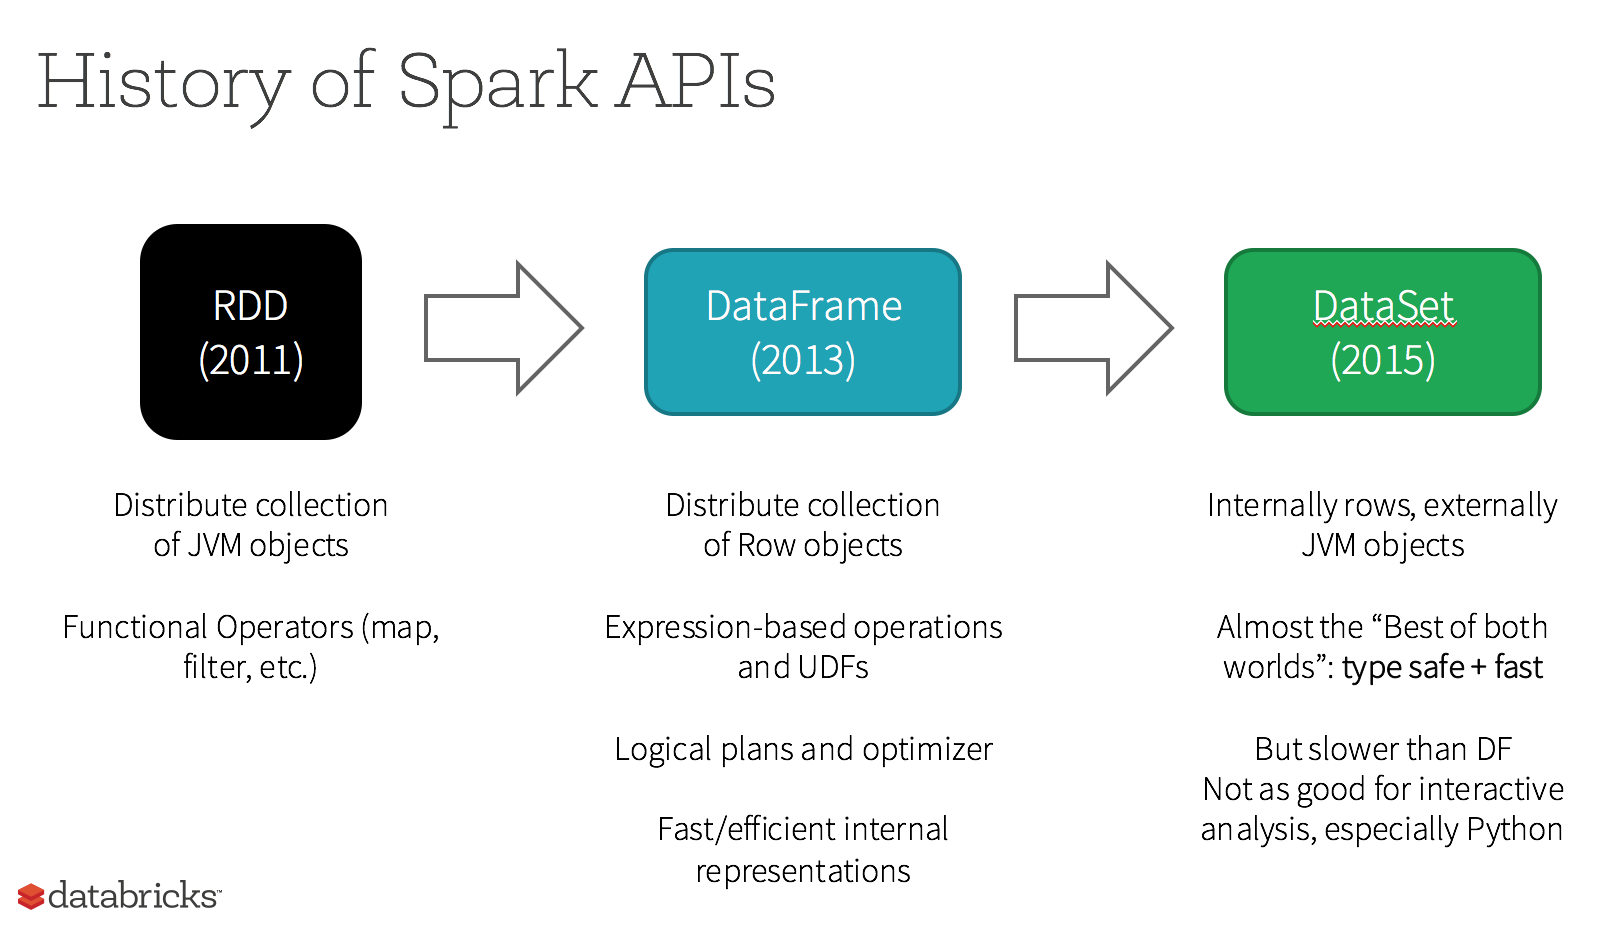

In [5]:
from IPython.display import Image
Image("History_of_Spark_APIs.png", width=700, height=500)

### 1.4. How does Spark work?

Apache Spark is an open source, general-purpose distributed computing framework for processing and analyzing big data. Like Hadoop MapReduce, Spark works with the system to distribute data across the cluster and process the data in parallel. Spark uses a master/slave architecture i.e. one central coordinator and many distributed workers (worker nodes). Here, the central coordinator is called the master node (driver).

The master node runs in its own Java process and communicates with a potentially large number of worker nodes. Each worker node is a separate Java process. A Spark Application is a combination of master node and its own worker nodes and is launched on a set of machines with the help of a cluster manager. Standalone Cluster Manager is the default built-in cluster manager of Spark, but other open source cluster managers include Hadoop Yarn and Apache Mesos.

So, to summarise, any Spark Application creates RDDs out of some input (which allows data to be processed in parallel by workers), run lazy transformations of these RDDs to some other form, and finally perform actions to collect or store data. 


### 1.5. How is Spark used in industry?

Spark is now the distributed computing framework of choice for proccessing big data and is used in a range of industries, some of which are outlined below. 

Online streaming is a growing area in the **media** industry. Netflix uses Spark for real-time stream processing to provide personalised online recommendations to customers. 

**Finance** is another sector where Spark’s real-rime processing plays an important role. Banks use Spark to access and analyse the social media profiles, credit risk assessments, provide targeted ads and customer segmentation. Furthermore, fraud detection is one of the most widely used areas for Spark's machine learning libraries.

**Healthcare** providers use Spark to analyse patient records and clinical data to identify patients highly likely to face health issues after being discharged from the clinic. Spark is also used to speed up genomic sequencing.

Large **retail and e-commerce** companies such as Alibaba run some of the largest Spark Jobs in the world to analyse petabytes of data e.g. feature extraction in image data. Likewise, eBay uses Spark to provide targeted offers, enhance customer experience and optimize overall performance.

----------------------------------------------------------

----------------------------------------------------------
## 2. PySpark 

As previously mentioned, Spark supports a variety of programming languages. This project will deploy Spark via the high level programming language Python, also known as PySpark. This is a Python API for Spark that allows one to harness the user friendly Python language and the power of Apache Spark in order to manage big data. 

**Why use Python with Spark?**

Although Spark was designed in Scala, making it almost 10 times faster than Python, Scala's speed is only apparent when the number of cores being used is less. As most analysis and processing requires a large number of cores, Scala does not have a large performance advantage.

Furthermore, for programmers Python is comparatively easier to learn because of its user-frienly syntax and libraries. Scala does have SparkMLlib, but does not have enough libraries and tools for machine learning, Natural language processing (NLP) and data visualisation. Moreover, Python is a dynamically typed language, which means RDDs can hold objects of multiple types.

----------------------------------------------------------

-------------------------------------------------
## 3. Project overview

_This project will leverage PySpark SQL and MLlib to query and extract the key topics discussed in the Reddit subreddit 'worldnews' in January 2017 using topic modelling._

 

**What is Reddit?**

Reddit is a popular social networking service for news aggregation, web content rating and organised forums dedicated to a specific topics known as subreddits. Members can sign up for free and can submit posts to subreddits which are then voted up or down by other members. Each subreddit is moderated by moderators who set the topic agenda and rules for commenting along with monitoring the subreddit for inappropriate behaviour. 

**Dataset**

The dataset includes all Reddit comments (78,946,585) from 3,578,907 authors from January 2017 (39.1 GB in size).

The data was collected from Academic Torrents, an online public data repository for large datasets [5]. The peer to peer file sharing system, BitTorrent was used to download the data. An alternative method would have been to use Google’s Big Query tool to extract the data from an online repository however, Google requires payment to query their databases so torrenting data from this website provides a cheaper method to acquire the data. 

The data is stored as a JavaScript Object Notation (JSON) file, a file type used for storing simple structures and objects.

-------------------------------------------------

------------------------------------------------------------------------
## 4. Setting up PySpark on Windows

This project uses PySpark on a local machine, which first needs to be installed. Installation differs slightly between Mac and Windows users. As this project will be conducted on a Windows laptop, a short tutorial for setting up Apache Spark with Python and Jupyter Notebooks on Windows will now be provided.

1) [Download](https://spark.apache.org/downloads.html) Apache Spark version 2.3.3 with the package type as 'Pre-built for Apache Hadoop 2.7 and later' (note that the Spark MLlib library does not seem to work properly for more recent versions). 

2) Move the file to where you want to unzip it on your local desktop.

```css 
mkdir C:\Paresh\spark

mv C:\Users\Paresh\Downloads\spark-2.3.3-bin-hadoop2.7.tgz C:\Paresh\spark\spark-2.3.3-bin-hadoop2.7.tgz
```

3) Unzip the file.

```css
gzip -d spark-2.3.3-bin-hadoop2.7.tgz
```

4) Download winutils.exe from [here](https://github.com/steveloughran/winutils/blob/master/hadoop-2.6.0/bin/winutils.exe?raw=true) and place in spark-2.3.3-bin-hadoop2.7\bin

```css
curl -k -L -o winutils.exe
```

5) Ensure [Java 7+](https://www.java.com/en/) is installed on your laptop.

6) Edit environmental variables so we can open a spark notebook in any directory.

```css
setx SPARK_HOME C:\opt\spark\spark-2.1.0-bin-hadoop2.7

setx HADOOP_HOME C:\opt\spark\spark-2.1.0-bin-hadoop2.7

setx PYSPARK_DRIVER_PYTHON jupyter

setx PYSPARK_DRIVER_PYTHON_OPTS notebook

setx Path C:\opt\spark\spark-2.1.0-bin-hadoop2.7\bin 

```
Alternatively, this can be done manually. In the Windows search bar type 'view advanced system setting'. Click on environment variables>new>set variable paths for SPARK_HOME, HADOOP_HOME, PYSPARK_DIVER_PYTHON, PYSPARK_DRIVER_PYTHON_OPTS, Path as stated above. 

7) Open cmd and type 'pyspark --driver-cores 8'. PySpark should now launch with 8 cores (you can change this up to the total number of cores for your laptop). PySpark should now be working. 


8) _Sometimes PySpark SQL may not work. If so, try the following fix._ 

Try running the following on the command line:

```css
%HADOOP_HOME%\bin\winutils.exe ls \tmp\hive
%HADOOP_HOME%\bin\winutils.exe chmod 777 \tmp\hive
%HADOOP_HOME%\bin\winutils.exe ls \tmp\hive
```
The first line lists current permissions, the second sets permissions and the third checks if the list has updated the current set of permissions.

-------------------------------------------------

----------------------------------------------------------

## 5. Querying the Data via PySpark SQL

Now that we have PySpark installed, let us load and query the data to familiarise ourselves with the dataset.

Querying data can be achieved by PySpark SQL. PySpark SQL is a higher-level abstraction module over the PySpark Core. It is used for processing structured and semi-structured datasets. It also provides an optimized API that can read the data from the various data source containing different files formats [6]. 

In this section we will:
- 5.1. Import relevant libraries
- 5.2. Load the data
- 5.3. Create a test sample to test code
- 5.4. Print the schema and take an example row
- 5.5. Run simple and complex queries to understand the data and explore a range of  PySpark SQL queries
- 5.6. Extract and explore the relevant 'worldnews' subreddit

### 5.1. Import relevant libraries

In [9]:
# import libraries

from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime
import pandas as pd
import numpy as np


#setting SQL context
sqlContext = SQLContext(sc)

### 5.2. Load the data

In [2]:
# load data
filename = 'C:\\Paresh\\RC_2017-01.json'

data = spark.read.json(filename)
data.createOrReplaceTempView("data")

### 5.3. Create a test sample to test code

Before running the code on the full dataset a sub-sample was extracted to test the code.  

In [19]:
## subset the data for testing
#test = spark.sql("SELECT * FROM data LIMIT 50000").toPandas()
#test.to_json('C:\\Paresh\\temp.json', orient='records', lines=True)
#test.to_csv('C:\\Paresh\\temp.csv')
#test.head()

## load data
#filename = 'C:\\Paresh\\temp.json'

#data = spark.read.json(filename)
#data.createOrReplaceTempView("data")

### 5.4. Print the schema and take an example row

In [3]:
# infer schema
data.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



An interpretation of the column headings can be found below:

| Column heading | Interpretation   |
|---------------------|---------------------------------|
| author              | Online username           |
| author_flair_css_class | Unknown         |
| author_flair_text  |  Unknown         |
| body  |  Comment         |
| controversiality  |  Controversial comment (1 if true 0 if false)        |
| created_utc  |  Time of comment creation (unix timestamp)         |
| distinguished  |  NA or moderator if one of the subreddit moderators made a comment        |
| edited  |  True if comment editted, false if not        |
| gilded  |  Unknown         |
| id  |  Unique user ID         |
| link_id  |  ID of comment replying to parent comment       |
| parent_id  |  ID of original comment         |
| retrieved_on  | Date comment was retrieved        |
| score  | Number of upvotes minus downvotes        |
| stickied  |  Unknown         |
| subreddit  |  Name of subreddit         |
| subreddit_id  |  Unique subreddit ID       |

In [5]:
# take example rows
data.take(2)

[Row(author='captnkaposzta', author_flair_css_class='NYAN', author_flair_text=None, body='Beileid? Kiwi Fernsehgarten Trinkspiele retten jede Party.\n\nGesundes Neues\n', controversiality=0, created_utc=1483228800, distinguished=None, edited='false', gilded=0, id='dbumnpz', link_id='t3_5lc6zb', parent_id='t1_dbulzrw', retrieved_on=1485679711, score=2, stickied=False, subreddit='de', subreddit_id='t5_22i0'),
 Row(author='CampyJejuni', author_flair_css_class=None, author_flair_text=None, body='Wrong subreddit mate.', controversiality=0, created_utc=1483228800, distinguished=None, edited='false', gilded=0, id='dbumnq0', link_id='t3_5lai4x', parent_id='t1_dbum9w2', retrieved_on=1485679711, score=3, stickied=False, subreddit='TwoXChromosomes', subreddit_id='t5_2r2jt')]

### 5.5. Run simple and complex queries to understand the data and explore a range of  PySpark SQL queries

**Basic facts**

How many total comments, unique comments, authors, unique subreddits, deleted comments and controversial comments are there? 

In [6]:
# total comments, unique comments, authors and unique subreddits
spark.sql("SELECT COUNT(body) AS total_comments, COUNT(DISTINCT body) AS unique_comments, COUNT(DISTINCT author) AS\
           total_authors, COUNT(DISTINCT subreddit) AS subreddits FROM data").show()

+--------------+---------------+-------------+----------+
|total_comments|unique_comments|total_authors|subreddits|
+--------------+---------------+-------------+----------+
|      78946585|       68384591|      3578907|     78201|
+--------------+---------------+-------------+----------+



In [7]:
# deleted comments
spark.sql("SELECT COUNT(body) AS deleted_comments FROM data WHERE body = '[deleted]'").show()

# controversial comments
spark.sql("SELECT SUM(controversiality) AS controversial_comments FROM data WHERE controversiality = '1'").show()

+----------------+
|deleted_comments|
+----------------+
|         3272882|
+----------------+

+----------------------+
|controversial_comments|
+----------------------+
|               1509216|
+----------------------+



**Subreddit analysis**

_What are the 50 most popular subreddits by comment count?_

In [8]:
# 50  most popular subreddits by comments
pop_sr = spark.sql("SELECT subreddit, COUNT(body) FROM data GROUP BY subreddit ORDER BY COUNT(body) DESC LIMIT 50").toPandas()

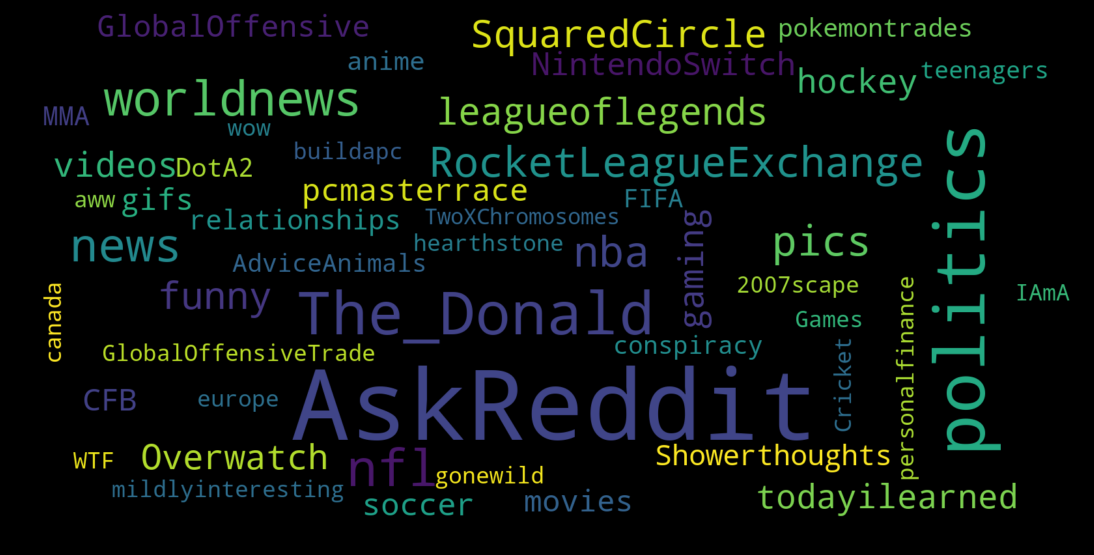

In [9]:
# create dictionary to store subreddits and frequencies
d = {}
for a, x in pop_sr.values:
    d[a] = x

# plot wordcloud 
wordcloud = WordCloud(width=1600, height=800, max_font_size=150)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show();

From the word cloud we can see that the most popular subreddit is 'AskReddit'. This subreddit is forum dedicated to asking and answering thought-provoking questions to the whole Reddit community [7]. Other popular subreddits incude 'politics', 'The_Donald' and 'worldnews'.


_What is the highest score of a comment in each subreddit that mentions the 'AskReddit' subreddit?_

In [10]:
# highest scoring comments in subreddits that mention the subreddit 'AskReddit' (only take top 20)
spark.sql("SELECT subreddit, MAX(score) FROM data WHERE body LIKE '%/r/AskReddit%' GROUP BY \
           subreddit ORDER BY MAX(score) DESC").show(20)

+-------------------+----------+
|          subreddit|max(score)|
+-------------------+----------+
|          AskReddit|     12710|
|               tifu|      6219|
|             videos|      3173|
|              funny|      1599|
|               gifs|      1396|
|             gaming|       921|
|              Jokes|       853|
|               pics|       756|
|     SubredditDrama|       522|
|                aww|       499|
|      AdviceAnimals|       427|
|             movies|       343|
|                sex|       322|
|             AskMen|       310|
|       PrequelMemes|       307|
|UnresolvedMysteries|       302|
|           politics|       269|
|      todayilearned|       258|
|      OldSchoolCool|       195|
|            RoastMe|       191|
+-------------------+----------+
only showing top 20 rows



The highest scoring comment that mentions the 'AskReddit' subreddit is from within the same subreddit. Other comments which mention 'AskReddit' and have high scores tend to be from other popular subreddits e.g. 'tifu', 'videos' and 'funny'. As these subreddits are very popular they are likely to contain a high scoring comments as there are more active users.

**Comment analysis**

_What are the top 5 replied to parent comments?_ 

In [14]:
# top 5 replied to parent comments
spark.sql("SELECT parent_id, COUNT(parent_id) AS value_occurrence FROM data WHERE \
           author!= '[deleted]' AND body!= '[deleted]' AND body!= '[removed]' GROUP BY parent_id ORDER BY \
           value_occurrence DESC LIMIT 5").show()

+---------+----------------+
|parent_id|value_occurrence|
+---------+----------------+
|t3_5o6fc6|           38383|
|t3_5pj1oy|           27996|
|t3_5mt82e|           24015|
|t3_5mea9h|           22666|
|t3_5qxrdz|           22479|
+---------+----------------+



_What is the text of most replied to comment?_

In [16]:
# text of most replied to comment
spark.sql("SELECT subreddit, body FROM data WHERE parent_id='t3_5o6fc6' AND link_id='t3_5o6fc6'").take(5)

[Row(subreddit='nfl', body='[removed]'),
 Row(subreddit='nfl', body='This is gonna be gooooood.'),
 Row(subreddit='nfl', body="Today, I'm a Cowboys fan. "),
 Row(subreddit='nfl', body="So where's today's theme mods?"),
 Row(subreddit='nfl', body='[deleted]')]

Although the parent comment has been removed, from looking at the replies and after conducting a quick Google search, we can infer that this comment was about the NFL game between the Green Bay Packers and Dallas Cowboys. This game was particularlly thrilling as it went down to the final play. More infomation on the game can be found [here.](https://www.theguardian.com/sport/2017/jan/15/green-bay-packers-dallas-cowboys-nfl-game-report)

**Author analysis**

_Which authors commented the most in January 2017 across all subreddits?_

In [17]:
# get authors that have commented the most on Reddit
users = spark.sql("SELECT author, COUNT(author) AS value_occurrence FROM data WHERE \
           author!= '[deleted]' AND body!= '[deleted]' GROUP BY author ORDER BY value_occurrence DESC LIMIT 20").toPandas()

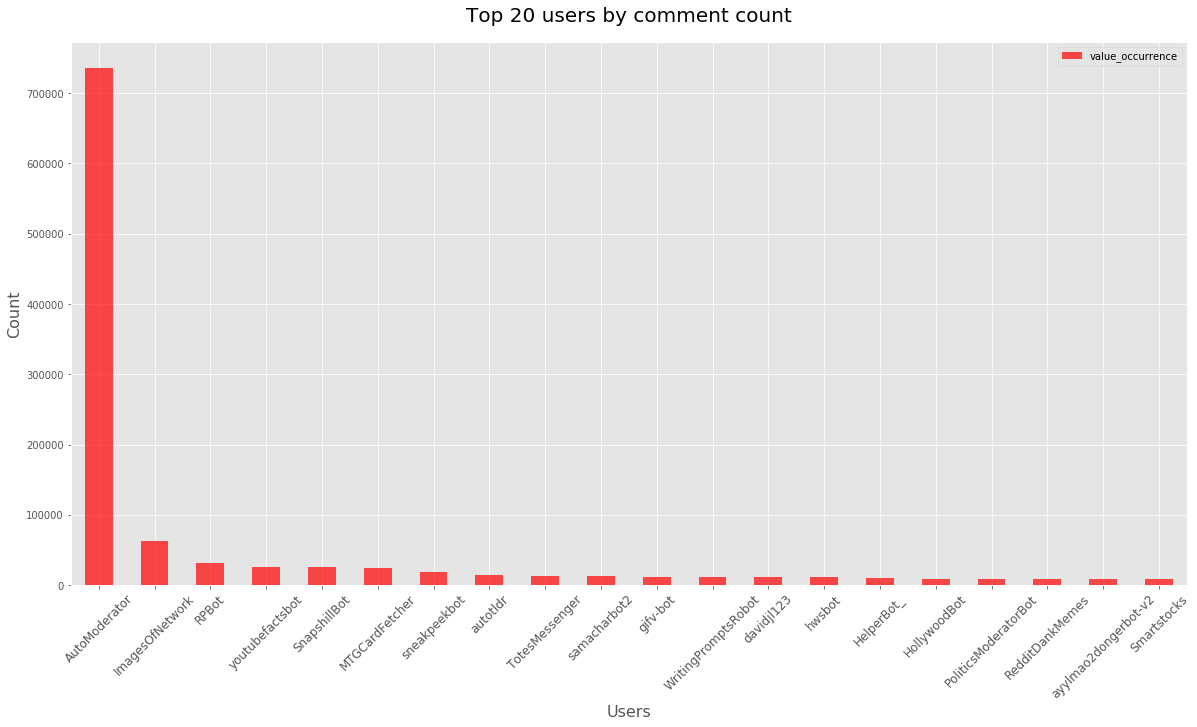

In [18]:
# create a list of top 20 authors
users_lst = users.iloc[:,0].tolist()

# set plot style
plt.style.use('ggplot')

# set figure 
fig, ax = plt.subplots(figsize=(20,10))
users.plot(kind='bar', color = 'r', alpha=0.7, ax=ax)

#set labels
ax.set_ylabel('Count', fontsize = 16)
ax.set_xlabel('Users', fontsize = 16)
ax.set_title('Top 20 users by comment count', fontsize=20, pad = 20)
ax.set_xticklabels(users_lst, rotation=45, fontsize = 12);

Here we can see that 'AutoModerator' had the most comments by far of any author in January 2017. The second most comments by a user is 10x less than 'AutoModerator'. After a quick Google search, we discovered that 'AutoModerator' is a bot which monitors new and editted submissions and comments in subreddits and is used by many subreddit moderators to help moderate their subredit. More infomation on 'AutoModerator' can be found [here.](https://www.reddit.com/r/AutoModerator/comments/q11pu/what_is_automoderator/) 

Most of the other high comment users are also bots; this is not surprising as unusually high activity on social media has been linked to bots activity [8]. 


_What are most comments by a bot in a subreddit?_ 

In [7]:
# get most comments by a bot in a subreddit
spark.sql("SELECT author, subreddit, COUNT(author) FROM DATA WHERE author LIKE '%bot%' OR author LIKE '%Bot%'\
           OR author LIKE '%AutoModerator%' GROUP BY author,subreddit ORDER BY COUNT(author) DESC").show(20)

+--------------------+--------------------+-------------+
|              author|           subreddit|count(author)|
+--------------------+--------------------+-------------+
|       AutoModerator|           AskReddit|        87690|
|       AutoModerator|            politics|        45654|
|       AutoModerator|GlobalOffensiveTrade|        25869|
|       AutoModerator|              videos|        25092|
|               RPBot|       NoSillySuffix|        15416|
|        SnapshillBot|     EnoughTrumpSpam|        14719|
|       AutoModerator|             Boogeeb|        14079|
|       AutoModerator|               Music|        13382|
|       AutoModerator|RocketLeagueExchange|        12912|
| WritingPromptsRobot|      WritingPrompts|        11916|
|              hwsbot|        hardwareswap|        11312|
|       AutoModerator|        dirtykikpals|        10751|
|       AutoModerator| RandomActsOfBlowJob|        10126|
|        HollywoodBot|RocketLeagueExchange|         9465|
|PoliticsModer

The bots searched for are just a rough estimate of all of the bots on Reddit as we do not have a list of all bots. However, with this in mind, 'AutoModerator' appears to be the bot to have commented the most in the top 20 subreddits commented in by bots. Furthermore, it appears to have commented in many of the most popular subreddits. The other bots in the top 20 are all different and thus are probably specific to certain subreddits where as 'AutoModerator' is used more generally across many subreddits. These other bots have tended to post frequently in some of the more niche subreddits. This would explain why 'AutoModerator' has produced so many more comments than other bots in the bar graph above.

_Which authors have the most popular comment by score for each subreddit, what was the comment, subreddit and score?_

In [3]:
# authors with the most popular comment by score for each subreddit (only showing top 20)
spark.sql("SELECT a.id, a.author, a.body, a.subreddit, a.score FROM data a INNER JOIN (SELECT subreddit, MAX(score) \
           AS MaxScore FROM data WHERE body!= '[removed]' GROUP BY subreddit) b ON a.subreddit = b.subreddit AND\
           a.score = b.MaxScore ORDER BY a.score DESC").show(20)

+-------+--------------------+--------------------+---------------+-----+
|     id|              author|                body|      subreddit|score|
+-------+--------------------+--------------------+---------------+-----+
|dc436p3|           Pottstick|And there it is. ...|      AskReddit|62953|
|dcc5bey|Pick_Locks_Get_Money|Your relationship...|        RoastMe|34820|
|dbvds6w|            JebNorth|I still wouldn't ...|         AskMen|32468|
|dcpug4q|          CrimsonPig|*Coming this fall...|           pics|32168|
|dc8pwe3|            Gddboygb|People frequently...|           IAmA|28343|
|dd0y5sb|             RoozGol|Iranian here: We ...|      worldnews|28328|
|dd3dhhj|      freerangechook|Did you know that...|          funny|28242|
|dcsv812|           Last_Jedi|MY TIME TO SHINE ...|         movies|28136|
|dd49dqe|            Panda413|“Our progress in ...|           blog|26894|
|dcbbkdg|   WhatsAMisanthrope|I see you trapped...|            aww|25507|
|dc9gje7|     SternballAllDay|JERRY YO

The top scoring comment from a subreddit has nearly double the score of the second highest scoring comment from a subreddit. As expected, the most popular comments for a subreddit are found in many of the popular subreddits as there are many frequent users in these subreddits to upvote (or downvote) comments.  

Furthermore, the authors with the highest scoring comments do not appear to be bots.

### 5.6. Extract and explore the relevant 'worldnews' subreddit

Now that we have familarised ourselves with the important features in the dataset, let us extract all of the comments from the 'worldnews' subreddit, which will be used later for topic modelling. Furthermore, we will explore this new-formed datset by looking at the total number of comments, the number of pairs of authors who commented on the same day and the frequency of comments over January 2017.

**Create PySpark dataframe for 'worldnews' subreddit**

In [3]:
# extract worldnews positive scoring, non-controversial, non-distinguished parent comments with bot comments removed.
worldnews = spark.sql("SELECT author, body, created_utc, score, subreddit\
                       FROM data WHERE subreddit IN ('worldnews')\
                       AND score>0 AND controversiality=0 AND distinguished IS NULL AND link_id=parent_id\
                       AND author NOT LIKE '%bot%' AND author NOT LIKE '%Bot%' AND author NOT LIKE '%AutoModerator%'\
                       AND body!= '[deleted]' AND body!= '[removed]' AND author!= '[deleted]' AND author!= '[removed]'")

worldnews.registerTempTable("worldnews")

In [5]:
# count total comments 
spark.sql("SELECT COUNT(body) AS total_comments FROM worldnews").show()

+--------------+
|total_comments|
+--------------+
|         93643|
+--------------+



The 'worldnews' subreddit makes up (93,643/78,946,585)*100 = ~0.12% of the whole Reddit datatset. 

**How many times did a pair of authors comment on the same day?**

In [4]:
# change created_utc column from unix code to datetime and register temporary table
sqlContext.registerFunction("day", lambda x: datetime.utcfromtimestamp(x).strftime('%D'))
sqlContext.registerDataFrameAsTable(worldnews, "worldnews")
df_day = sqlContext.sql("SELECT *, day(created_utc) as day FROM worldnews")
df_day.registerTempTable("df_worldnews")

In [112]:
# create table for pairs of authors who comment on the same day
pairs = spark.sql("SELECT a.day AS day, LEAST(a.author, b.author) AS author1, GREATEST(a.author, b.author)\
                  AS author2 FROM df_worldnews a JOIN df_worldnews b ON a.day = b.day WHERE a.author != b.author AND\
                  a.author!= '[deleted]' AND b.author!= '[deleted]'").distinct()
pairs.registerTempTable("pairs")

In [113]:
# see the top 10 pairs
spark.sql("SELECT author1, author2, count(1) AS pair_count FROM pairs GROUP BY author1,\
           author2 ORDER BY count(1) DESC").show(10)

+----------------+----------------+----------+
|         author1|         author2|pair_count|
+----------------+----------------+----------+
|Mentioned_Videos|        autotldr|        31|
|       Makdranon|        autotldr|        29|
|       Makdranon|Mentioned_Videos|        29|
|        autotldr|  oblivionrecurs|        27|
|Mentioned_Videos|     sovietskaya|        27|
|        autotldr|     sovietskaya|        27|
|        ETnoHome|        autotldr|        27|
|        ETnoHome|Mentioned_Videos|        27|
|Mentioned_Videos|  oblivionrecurs|        27|
|Mentioned_Videos| _Damn_Russians_|        26|
+----------------+----------------+----------+
only showing top 10 rows



From the above we can see that only one author pair commented in the subreddit everyday in month, two author pairs commented on the same day 29 times and six author pairs commented on the same day 27 times. 

**How did comments fluctate throughout January**

In [5]:
# create df of frequency of comments per day and convert to pandas df for plotting
df = spark.sql("SELECT day, COUNT(1) AS count FROM df_worldnews GROUP BY day ORDER BY day ASC").toPandas()

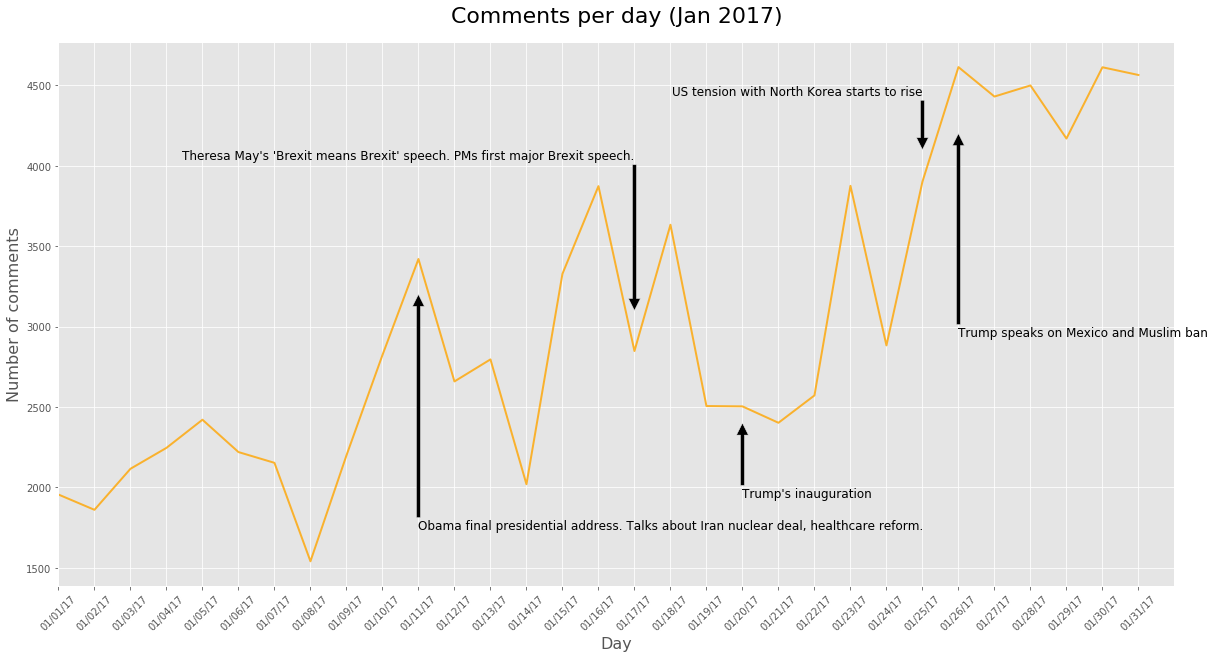

In [111]:
# set plot style
plt.style.use('ggplot')

#set figure
fig, ax = plt.subplots(figsize=(20, 10))

# set plot 
ax.plot(range(1,1+len(df["day"])), df["count"], color = 'orange', alpha = 0.8, linewidth=2)
ticks = np.arange(1,32,1)
ax.set_xticks(ticks)
ax.set_xlim([1,32])
labels = [i for i in df["day"]]
ax.set_xticklabels(labels, rotation=45)

#set labels
ax.set_title('Comments per day (Jan 2017)', pad = 20, fontsize = 22)
ax.set_xlabel('Day', fontsize = 16)
ax.set_ylabel('Number of comments', fontsize = 16)


# annotate text
ax.annotate('Obama final presidential address. Talks about Iran nuclear deal, healthcare reform.', xy=(11, 3200),xytext=(11, 1800), 
            arrowprops=dict(facecolor='black'),horizontalalignment='left',verticalalignment='top', fontsize = 12)

ax.annotate("Theresa May's 'Brexit means Brexit' speech. PMs first major Brexit speech.", xy=(17, 3100), xytext=(17, 4100), 
            arrowprops=dict(facecolor='black'),horizontalalignment='right',verticalalignment='top', fontsize = 12)

ax.annotate("Trump's inauguration", xy=(20, 2400),xytext=(20, 2000), 
            arrowprops=dict(facecolor='black'),horizontalalignment='left',verticalalignment='top', fontsize = 12)

ax.annotate("Trump speaks on Mexico and Muslim ban", xy=(26, 4200),xytext=(26, 3000), 
            arrowprops=dict(facecolor='black'),horizontalalignment='left',verticalalignment='top', fontsize = 12)

ax.annotate("US tension with North Korea starts to rise", xy=(25, 4100),xytext=(25, 4500), 
            arrowprops=dict(facecolor='black'),horizontalalignment='right',verticalalignment='top', fontsize = 12);

Generally, there is not a lot of news in early January as many people chose to take time off work for new years. However, the number of comments in the 'worldnews' subreddit increases over the month with some fluctation between days.

The number of comments appear to peak on most Tuesdays and Sundays. This may happen as users react to the new weekly news (i.e. Monday's news) on Tuesday and people are often on their phones more during weekends (especially Sunday) so are more likely to comment. Moreover, comments tend to peak around key political events, in particular, US political events, as many users on Reddit are American. 

We can see a build up of comments in anticipation of Obama's last presidental address and a spike in comments after Thersa May's first major Brexit speech. Surprisingly, there is not an uptick in comments straight after Trump's inaugeration, but rather a small delay before comment volume increases. This may be because Trump's inaugeration was a pre-determined event so people do not react as much as with new news. As he starts to announce new policies the total volume of comments is at it's largest for the month.

Despite these events, there is a chance comments are related to other world news topics not discussed here. Hopefully, the next section on topic modelling will help to provide some further clarity on the key topics discussed in January 2017.  


------------------------------------

-------------------------------------------------
## 6.  Topic Modelling via PySpark MLlib

Now that we have extracted the relevant data, let us create a topic model via PySpark MLlib to identify the key topics discussed in the 'worldnews' subreddit. However, before we create this model, background infomation on PySpark MLlib and topic modelling will be provided.

### 6.1. What is PySpark MLlib?

PySpark MLlib is a wrapper over the PySpark Core that performs data analysis using distributed implementations of machine learning algorithms. MLlib includes a framework for creating machine learning pipelines, allowing for easy implementation of feature extraction, selections, and transformations on any structured dataset. Models can be trained in PySpark, saved using MLLib, and then imported into a Java-based or Scala-based pipeline for production use.


### 6.2. What is topic modelling?

Topic modelling is an unsupervised learning approach to automatically identify topics present in a text corpus. There are many techniques to obtain topics from documents, but Latent Dirichlet Allocation (LDA), developed by Blei et al., 2003 [9], is one of the most popular.

In the LDA model, documents are viewed as a mixture of topics that are present in the corpus and topics are viewed as a distribution over words. The LDA model discovers the different topics that the documents represent and how much of each topic is present in a document. This is a probabilistic model with 3 steps:

1) Choose $\theta_{i}$ ∼ Dirichlet(α)

2) Choose $\beta_{k}$ ∼ Dirichlet(δ)

3) For each word in document i:
   - Choose a topic $z_{k}$ ∼ Multinomial($\theta_{i}$)
   - Choose a word wim ∼ Multinomial($\beta_{i,k=z_{k}}$)

where:

- α = parameter of Dirichlet prior on distribution of topics over docs

- $\theta_{i}$ = topic distribution for document i

- δ = parameter of Dirichlet prior on distribution of words over topics

- $\beta_{k}$ = word distribution for topic k

So, how does LDA learn the topic representations?

One method is to use Collapsed Gibbs sampling [10], the procedure is outlined below:

i) Randomly assign each word in each document to one of K topics (where K is pre-determined). This will give topic representations to all documents and word distributions to all the topics; although these will not be good representations.

ii) Thus, to improve, for each document d, go through each word w and compute:
- p(t|d): proportion of words in d that are assigned to topic t
- p(w|t): proportion of assignments to t, over all d, that come from w

iii) Next reassign word w a new topic t’, where we choose topic t’ with probability p(t’|d) * p(w|t’) = p(w|d)

iv) Repeat the previous step a large number of times, until a steady state is reached where topic assignment is good and use this to determine the topic mixtures for each document. Each document is then alloacted to the topic which has the highest probability.

### 6.3. Text pre-processing

Before running the topic model one must pre-process the corpus of text to standarised and remove unwanted features. 

In [9]:
# import NLP libraries
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop_words = set(stopwords.words('english'))
table = str.maketrans('', '', string.punctuation)
lmtzr = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer

In [10]:
# create a list of the comments
worldnews_lst = worldnews.rdd.map(lambda x: x[1]).collect()
worldnews_lst[1:3]

['I wonder if something similar will happen in Times Square.',
 'Attackers were wearing Santa costumes reportedly.']

In [20]:
# remove comments with less than 5 words and more than 1000 words
lst = [len(worldnews_lst[i].split()) for i in range(0, len(worldnews_lst))]
lst = [i for i,x in enumerate(lst) if x>=6 & x<=999]
worldnews_lst_updated = [worldnews_lst[i] for i in lst]  

In [58]:
# define function to tokenise and pre-process tokens

def get_tokens(line):
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuations from each word
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    # lemmatizing the words
    #words = [lmtzr.lemmatize(w) for w in words]
    # stemming the words
    porter = PorterStemmer()
    words = [porter.stem(w) for w in words]
    return (words)

In [83]:
# parallelise list and apply get_tokens function
news = sc.parallelize(worldnews_lst_updated)
news_rdd = news.map(lambda line: (1, get_tokens(line)))

In [84]:
# get frequently occuring stop words
doc_stop_words = news_rdd.flatMap(lambda r: r[1]).map(lambda r: (r,1)).reduceByKey(lambda a,b: a+b)
doc_stop_words = doc_stop_words.filter(lambda a: a[1]>3000).map(lambda r: r[0]).collect()

# throw away stop words and words that are 1 letter.
news_rdd = news_rdd.map(lambda r: (r[0],[w for w in r[1] if not w in doc_stop_words and not len(w)==1]))    

news_rdd.take(1)[0][1][:10]

['great', 'start']

In [85]:
# convert tokens into sparse vectors
from pyspark.ml.feature import CountVectorizer
from pyspark.sql.functions import monotonically_increasing_id

news_df = spark.createDataFrame(news_rdd, ["dummy","words"])
news_df.cache()
news_df.take(3)

[Row(dummy=1, words=['great', 'start']),
 Row(dummy=1, words=['wonder', 'someth', 'similar', 'squar']),
 Row(dummy=1, words=['attack', 'wear', 'santa', 'costum', 'reportedli'])]

In [86]:
# generate vectors that are a historgrams of word counts associated with each message
cv = CountVectorizer(inputCol="words", outputCol="features", minDF=2)

cv_model = cv.fit(news_df)

news_df_w_features = cv_model.transform(news_df)
news_df_w_features.cache()
news_df_w_features.show(10)

+-----+--------------------+--------------------+
|dummy|               words|            features|
+-----+--------------------+--------------------+
|    1|      [great, start]|(20586,[24,44],[1...|
|    1|[wonder, someth, ...|(20586,[9,130,642...|
|    1|[attack, wear, sa...|(20586,[29,890,20...|
|    1|[hong, kong, taiw...|(20586,[7,87,115,...|
|    1|[sadli, attack, s...|(20586,[7,22,24,2...|
|    1|[attack, wear, sa...|(20586,[29,890,20...|
|    1|[attack, wear, sa...|(20586,[29,890,20...|
|    1|[europ, usual, to...|(20586,[0,17,93,9...|
|    1|          [sanction]| (20586,[683],[1.0])|
|    1|[probabl, someth,...|(20586,[9,110,890...|
+-----+--------------------+--------------------+
only showing top 10 rows



### 6.4. Running the LDA model

As LDA is an unsupervised learning approach it is not always clear what the K value should be. Resultantly, a number of K values were tested and K=10 was found to produce the lowest lowest log liklihood and perplexity. These two measures are used to identify how well a probability model predicts a sample and thus can be used to compare probability models [11]. 

Furthermore, the Expectation-Maximisation (EM) and Online Variational Bayes (OVB) algorithms for LDA were tested. We find that the OVB algorithm works better than the EM algorithm (OVB is the default algorithm for the LDA function). This algorithm was developed by Hoffman et al., 2010 in their paper Online Learning for Latent Dirichlet Allocation [12]. 

In [118]:
# set K topics and fit LDA algorithm
from pyspark.ml.clustering import LDA

lda = LDA(k=10, seed=1, maxIter=100)

lda_model = lda.fit(news_df_w_features)

In [119]:
ll = lda_model.logLikelihood(news_df_w_features)

lp = lda_model.logPerplexity(news_df_w_features)

print("The lower bound on the log likelihood of the entire corpus: " + str(ll))

print("The upper bound on the perplexity: " + str(lp))

The lower bound on the log likelihood of the entire corpus: -9882807.8370136
The upper bound on the perplexity: 8.246685514667238


In [120]:
## Show the K topics
transformed = lda_model.transform(news_df_w_features)
transformed.select("words","topicDistribution").show(10)

# Show top 15 words per topic
topics = lda_model.describeTopics(15)

import numpy as np
topic_i = topics.select("termIndices").rdd.map(lambda r: r[0]).collect()
count = 1
for i in topic_i:
    print("Topic " + str(count))
    print(np.array(cv_model.vocabulary)[i])
    count += 1

+--------------------+--------------------+
|               words|   topicDistribution|
+--------------------+--------------------+
|      [great, start]|[0.71277380322823...|
|[wonder, someth, ...|[0.01361597393807...|
|[attack, wear, sa...|[0.01130677153255...|
|[hong, kong, taiw...|[0.00419393324723...|
|[sadli, attack, s...|[0.00257441604905...|
|[attack, wear, sa...|[0.01130677153247...|
|[attack, wear, sa...|[0.01130677153223...|
|[europ, usual, to...|[0.00335076689748...|
|          [sanction]|[0.03515678133719...|
|[probabl, someth,...|[0.71449014974820...|
+--------------------+--------------------+
only showing top 10 rows

Topic 1
['energi' 'power' 'war' 'coal' 'renew' 'great' 'ga' 'electr' 'plant'
 'solar' 'fuel' 'nuclear' 'wind' 'produc' 'clean']
Topic 2
['ban' 'nation' 'war' 'attack' 'muslim' 'order' 'law' 'immigr' 'refuge'
 'kill' 'israel' 'unit' 'terrorist' 'forc' 'group']
Topic 3
['russian' 'wwwyoutubecomwatch' 'report' 'video' 'watch' 'intellig'
 'elect' 'putin' 'sour

-------------------------------------------------

----------------------------------------------------------
## 7. Conclusion 

We can see that the majority of the 10 selected topics have a topic distribution between 0.003-0.035. However, the first and last topics have a topic distribution of 0.71, suggesting that they cover a wide range of topics. From the LDA model, we can see the following topics appear to be present:

- **Topic 1:** Energy
- **Topic 2:** Muslim ban/immigration
- **Topic 3:** Russia/election/hacking
- **Topic 4:** Quebec City mosque shooting 29th January
- **Topic 5:** Stop words
- **Topic 6:** Not clear
- **Topic 7:** Not clear. Maybe the extradition of El Chapo, the mexican drug kingpin, to the US. Maybe the nobel peace prize. Maybe a mix between these and other topics. 
- **Topic 8:** Not clear
- **Topic 9:** EU and Brexit
- **Topic 10:** Trump's plan to ask Mexico to pay for a wall on the Mexican-US border. 

Clearly, the topics presented are in line with some of the events mentioned in section 6, indicating that the model does a fairly good job of identifying key topics. For example, the Muslim ban and plans for the Mexican-US wall were announced by Trump in late January and Theresa May's Brexit speech in mid-January. Other topics were also found which were not mentioned in section 6 such as the Quebec shooting, energy, the nobel peace prize and the extradiction of El Chapo. 

A topic for Obama's last speech was not identified. This is suprising as he also spoke about topical issues like healthcare and the Iran nuclear deal. Also, no topic was identified for the US tensions with North Korea. This may have occured as it is hard to know when the LDA model is working as there is no objective metric to determine the best choice of parameters. Perplexity (how well the model explains the data) was used above and works well to test if the learning is working, but can be a poor indicator of the overall quality of a model e.g. a model with low perplexity, can still have uniformative topics. Resultantly, it is important to have some qualitative knowledge on the data (in this case being aware of the major world news headlines in January 2017), which can be used as a santity check. 

Overall, given that the model identifies several important topics, which we know were major news headlines in January 2017, this project concludes that the LDA model can be used to successfully topic model the 'worldnews' subreddit. 


----------------------------------------------------------

----------------------------------------------------------
## References 

1. Apach Spark. (2018). Spark Research. [online]. Available at: http://spark.apache.org/research.html
2. Zaharia.M., Mosharaf.C., J Franklin.M., Shenker.S., Stoica.I., 2010. Spark: Cluster Computing with Working Sets. [online]. Availale at: https://www.usenix.org/legacy/event/hotcloud10/tech/full_papers/Zaharia.pdf
3. Zaharia.M., Chowdhury.M, Das.T, Dave.T, Ma.J, McCauley.M., J Franklin.M., Shenker.S., Stoica.I., 2012. Resilient Distributed Datasets: A Fault-Tolerant Abstraction for In-Memory Cluster Computing. [online]. Available at: https://www.usenix.org/system/files/conference/nsdi12/nsdi12-final138.pdf
4. Databricks. (2018). A tale of three apache spark APIs. [online]. Available at: https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html
5. Academic Torrents. (2018). Reddit data. [online]. Available at: http://academictorrents.com/details/85a5bd50e4c365f8df70240ffd4ecc7dec59912b
6. Data Flair (2018). Apache Spark SQL Tutorial. [online]. Available at: https://data-flair.training/blogs/apache-spark-sql/
7. Reddit. (2018). AskReddit. [online]. Available at: https://www.reddit.com/r/AskReddit/
8. Technology Review. (2018). How to tell if you're talking to a bot. [online]. Available at: https://www.technologyreview.com/s/611655/how-to-tell-if-youre-talking-to-a-bot/
9. Blei, D. M., Ng, A. Y., and Jordan, M., I., 2003. Latent Dirichlet Allocation. [online]. Available at: http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf
10. Apache Spark. (2018). pyspark.ml package. [online]. Available at: https://spark.apache.org/docs/2.2.0/api/python/pyspark.ml.html#pyspark.ml.clustering.LDA
11. Rasmussen, C. E., 2016. Latent Dirichlet Allocation for Topic Modelling, lecture. [online]. Available at: http://mlg.eng.cam.ac.uk/teaching/4f13/1819/lda.pdf
12. Hoffman, M., Bach, F. R., and Blei, D. M., 2010. Online Learning for Latent Dirichlet Allocation. [online]. Available at: https://www.di.ens.fr/~fbach/mdhnips2010.pdf 
----------------------------------------------------------